In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shots = pd.read_csv('shot_logs.csv')

for i in range(5, len(shots.columns), 5):
    print(shots.head().iloc[:, i-5:i])

    GAME_ID                   MATCHUP LOCATION  W  FINAL_MARGIN
0  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24
1  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24
2  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24
3  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24
4  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24
   SHOT_NUMBER  PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES
0            1       1       1:09        10.8         2
1            2       1       0:14         3.4         0
2            3       1       0:00         NaN         3
3            4       2      11:47        10.3         2
4            5       2      10:34        10.9         2
   TOUCH_TIME  SHOT_DIST  PTS_TYPE SHOT_RESULT   CLOSEST_DEFENDER
0         1.9        7.7         2        made     Anderson, Alan
1         0.8       28.2         3      missed  Bogdanovic, Bojan
2         2.7       10.1         2      missed  Bogdanovic, Bojan
3         1.9   

In [3]:
print(shots['SHOT_RESULT'].value_counts())

missed    70164
made      57905
Name: SHOT_RESULT, dtype: int64


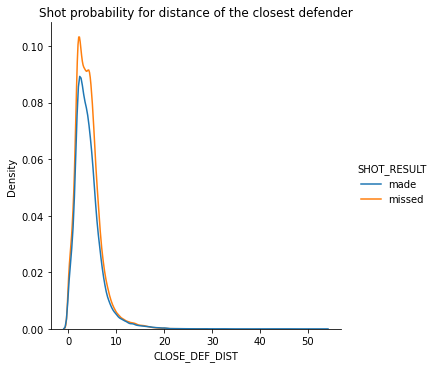

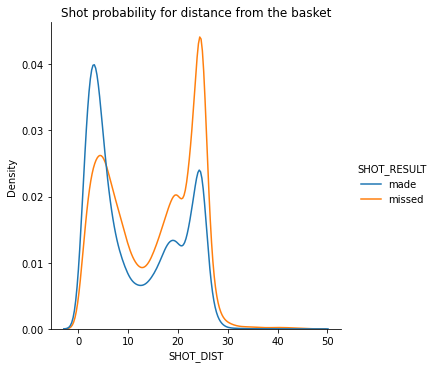

In [13]:
f = sns.displot(data=shots, x="CLOSE_DEF_DIST", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for distance of the closest defender")
plt.show()

f = sns.displot(data=shots, x="SHOT_DIST", kind='kde', hue='SHOT_RESULT')

plt.title("Shot probability for distance from the basket")
plt.show()

